# Proyek Analisis Data: [Brazilian E-Commerce Public Dataset by Olist]
- **Nama:** [Rizqi Maulidi]
- **Email:** [mc224d5y1546@student.devacademy.id]
- **ID Dicoding:** [MC224D5Y1546]

## Menentukan Pertanyaan Bisnis

- State mana yang memiliki jumlah pemesanan yang terbanyak?
- Berapa total revenue yang dihasilkan serta persentase biaya pengiriman?
- Bagaimana performa pendapatan total revenue yang dihasilkan setiap bulannya?
- Bagaimana tingkat kepuasan custumer berdasarkan hasil review?

## Import Semua Packages/Library yang Digunakan

In [1]:
!pip install pandas
import pandas as pd
!pip install matplotlib
import matplotlib.pyplot as plt
!pip install seaborn
import seaborn as sns
!pip install streamlit
import streamlit as st
from babel.numbers import format_currency
sns.set(style='dark')
!pip install contextily
!pip install geopandas
import geopandas as gpd
import contextily as ctx  # Untuk menambahkan basemap
import numpy as np



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


## Data Wrangling

### Gathering Data

In [54]:
customers_dataset_df = pd.read_csv("data/customers_dataset.csv")
customers_dataset_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [55]:
geolocation_dataset_df = pd.read_csv("data/geolocation_dataset.csv")
geolocation_dataset_df.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [56]:
order_items_dataset_df = pd.read_csv("data/order_items_dataset.csv")
order_items_dataset_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [57]:
order_payments_dataset_df = pd.read_csv("data/order_payments_dataset.csv")
order_payments_dataset_df.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [58]:
order_reviews_dataset_df = pd.read_csv("data/order_reviews_dataset.csv")
order_reviews_dataset_df.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [59]:
orders_dataset_df = pd.read_csv("data/orders_dataset.csv")
orders_dataset_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [60]:
products_dataset_df = pd.read_csv("data/products_dataset.csv")
products_dataset_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [61]:
sellers_dataset_df = pd.read_csv("data/sellers_dataset.csv")
sellers_dataset_df.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


In [62]:
product_category_name_translation_df = pd.read_csv("data/product_category_name_translation.csv")
product_category_name_translation_df.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


**Insight:**
- Kita dapat membuat keputusan apa saja data yang kita gunakan
- Ada beberapa data yang memiliki missing value dan duplikat sehingga perlu di tangani, namun data duplikat lokasi tidak perlu karena dapat menjadi insight yang manarik.

### Assessing Data

####Menilai data customers_dataset_df

In [63]:
customers_dataset_df.info() #liat outputnya data memiliki jumlah yang sama

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [64]:
customers_dataset_df.isna().sum() #ternyata missing value tidak ada

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

In [65]:
print("Jumlah duplikasi: ", customers_dataset_df.duplicated().sum())

Jumlah duplikasi:  0


In [66]:
customers_dataset_df.describe() #data yang bertipe int hanya customer_zip_code_prefix sehingga hanya kolom tersebut yang memiliki nilai statitik deskriptif lengkap

,customer_zip_code_prefix
count,99441.000000
mean,35137.474583
std,29797.938996
min,1003.000000
25%,11347.000000
50%,24416.000000
75%,58900.000000
max,99990.000000


**Insight:**
- Dari hasil diatas data aman dari missing value.
- Data diatas tidak terdapat duplikasi data.
- Tipe data juga sudah sesuai.

####Menilai data geolocation_dataset_df

In [67]:
geolocation_dataset_df.info() #liat outputnya data memiliki jumlah yang sama maka tidak ada missing value

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB


In [68]:
print("Jumlah duplikasi: ", geolocation_dataset_df.duplicated().sum()) #duplikasi tidak perlu dihapus karena ini menunjukan wilayah customer

Jumlah duplikasi:  261831


In [69]:
geolocation_dataset_df.describe()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng
count,1.000163e+06,1.000163e+06,1.000163e+06
mean,3.657417e+04,-2.117615e+01,-4.639054e+01
std,3.054934e+04,5.715866e+00,4.269748e+00
min,1.001000e+03,-3.660537e+01,-1.014668e+02
25%,1.107500e+04,-2.360355e+01,-4.857317e+01
50%,2.653000e+04,-2.291938e+01,-4.663788e+01
75%,6.350400e+04,-1.997962e+01,-4.376771e+01
max,9.999000e+04,4.506593e+01,1.211054e+02


**Insight:**
- data tersebut sudah sesuai sehingga tidak perlu masuk tahap cleanning.

####Menilai data order_items_dataset_df

In [70]:
order_items_dataset_df.info() #liat outputnya data memiliki jumlah yang sama tidak ada missing value

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [71]:
print("Jumlah duplikasi: ", order_items_dataset_df.duplicated().sum()) #tidak ada duplikasi aman

Jumlah duplikasi:  0


In [72]:
geolocation_dataset_df.describe()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng
count,1.000163e+06,1.000163e+06,1.000163e+06
mean,3.657417e+04,-2.117615e+01,-4.639054e+01
std,3.054934e+04,5.715866e+00,4.269748e+00
min,1.001000e+03,-3.660537e+01,-1.014668e+02
25%,1.107500e+04,-2.360355e+01,-4.857317e+01
50%,2.653000e+04,-2.291938e+01,-4.663788e+01
75%,6.350400e+04,-1.997962e+01,-4.376771e+01
max,9.999000e+04,4.506593e+01,1.211054e+02


**Insight:**
- data tersebut sudah sesuai sehingga tidak perlu masuk tahap cleanning.

####Menilai data order_payments_dataset_df

In [73]:
order_items_dataset_df.info() #liat outputnya data memiliki jumlah yang sama tidak ada missing value

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [74]:
print("Jumlah duplikasi: ", order_payments_dataset_df.duplicated().sum()) #tidak ada duplikasi aman

Jumlah duplikasi:  0


In [75]:
order_payments_dataset_df.describe()

,payment_sequential,payment_installments,payment_value
count,103886.000000,103886.000000,103886.000000
mean,1.092679,2.853349,154.100380
std,0.706584,2.687051,217.494064
min,1.000000,0.000000,0.000000
25%,1.000000,1.000000,56.790000
50%,1.000000,1.000000,100.000000
75%,1.000000,4.000000,171.837500
max,29.000000,24.000000,13664.080000


**Insight:**
- ada tipe data yang tidak sesuai dengan yang seharusnya sehingga harus disesuaikan di tahap cleaning

####Menilai data order_reviews_dataset_df

In [76]:
order_reviews_dataset_df.info() #liat outputnya data memiliki jumlah yang beda kemungkinan ada missing value!

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


In [77]:
order_reviews_dataset_df.isna().sum() #ternyata ada missing value

review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64

In [78]:
print("Jumlah duplikasi: ", order_reviews_dataset_df.duplicated().sum()) #tidak ada duplikasi aman

Jumlah duplikasi:  0


In [79]:
order_reviews_dataset_df.describe()

,review_score
count,99224.000000
mean,4.086421
std,1.347579
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


**Insight:**
- ada data yang kosong sehingga perlu ditangani di tahap cleaning.

####Menilai data orders_dataset_df

In [80]:
orders_dataset_df.info() #liat outputnya data memiliki jumlah yang beda kemungkinan ada missing value!

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [81]:
orders_dataset_df.isna().sum() #ternyata ada missing value

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [82]:
print("Jumlah duplikasi: ", orders_dataset_df.duplicated().sum()) #tidak ada duplikasi aman

Jumlah duplikasi:  0


In [83]:
orders_dataset_df.describe()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,98875,90733,81018,95664,459
top,66dea50a8b16d9b4dee7af250b4be1a5,edb027a75a1449115f6b43211ae02a24,delivered,2018-08-02 12:05:26,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-05-08 19:36:48,2017-12-20 00:00:00
freq,1,1,96478,3,9,47,3,522


**Insight:**
- ada tipe data yang tidak sesuai sehingga perlu ditangani di tahap cleaning.

####Menilai data products_dataset_df

In [84]:
products_dataset_df.info() #liat outputnya data memiliki jumlah yang beda kemungkinan ada missing value!

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [85]:
products_dataset_df.isna().sum() #ternyata ada missing value

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

In [86]:
print("Jumlah duplikasi: ", products_dataset_df.duplicated().sum()) #tidak ada duplikasi aman

Jumlah duplikasi:  0


In [87]:
products_dataset_df.describe()

,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32341.000000,32341.000000,32341.000000,32949.000000,32949.000000,32949.000000,32949.000000
mean,48.476949,771.495285,2.188986,2276.472488,30.815078,16.937661,23.196728
std,10.245741,635.115225,1.736766,4282.038731,16.914458,13.637554,12.079047
min,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000
max,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000


**Insight:**
- ada missing value sehingga perlu ditangani di tahap cleaning.

####Menilai data sellers_dataset_df

In [88]:
sellers_dataset_df.info() #liat outputnya data memiliki jumlah yang sama tidak ada missing value

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


In [89]:
print("Jumlah duplikasi: ", sellers_dataset_df.duplicated().sum()) #tidak ada duplikasi aman

Jumlah duplikasi:  0


In [90]:
sellers_dataset_df.describe()

,seller_zip_code_prefix
count,3095.000000
mean,32291.059451
std,32713.453830
min,1001.000000
25%,7093.500000
50%,14940.000000
75%,64552.500000
max,99730.000000


**Insight:**
- data sudah sesuai yang dibutuhkan tidak perlu masuk tahap cleaning

####Menilai data product_category_name_translation_df

In [91]:
product_category_name_translation_df.info() #liat outputnya data memiliki jumlah yang sama tidak ada missing value

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


In [92]:
print("Jumlah duplikasi: ", product_category_name_translation_df.duplicated().sum()) #tidak ada duplikasi aman

Jumlah duplikasi:  0


In [93]:
product_category_name_translation_df.describe()

,product_category_name,product_category_name_english
count,71,71
unique,71,71
top,beleza_saude,health_beauty
freq,1,1


**Insight:**
- data sudah sesuai yang dibutuhkan tidak perlu masuk tahap cleaning

### Cleaning Data

####Membersihkan data order_items_dataset_df

In [94]:
order_items_dataset_df.info() #liat outputnya data memiliki jumlah yang sama tidak ada missing value

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [95]:
# List kolom yang ingin diubah tipe datanya
datetime_columns = [
    "shipping_limit_date"
]

# Mengubah tipe data kolom-kolom menjadi datetime
for column in datetime_columns:
    order_items_dataset_df[column] = pd.to_datetime(order_items_dataset_df[column], errors='coerce')

order_items_dataset_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   order_id             112650 non-null  object        
 1   order_item_id        112650 non-null  int64         
 2   product_id           112650 non-null  object        
 3   seller_id            112650 non-null  object        
 4   shipping_limit_date  112650 non-null  datetime64[ns]
 5   price                112650 non-null  float64       
 6   freight_value        112650 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 6.0+ MB


**Insight:**
- perubahan tipe data kedalam datetime

####Membersihkan data order_reviews_dataset_df

In [96]:
order_reviews_dataset_df.isna().sum() #ternyata ada missing value

review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64

In [97]:
order_reviews_dataset_df.review_comment_title.value_counts() #pakai imputation

review_comment_title
Recomendo                    423
recomendo                    345
Bom                          293
super recomendo              270
Excelente                    248
                            ... 
Atraso na entrega do prod      1
Compras On Line                1
Relogio de pulso               1
Ótima mercadoria               1
Maravilhoso!                   1
Name: count, Length: 4527, dtype: int64

In [98]:
order_reviews_dataset_df.fillna(value="No comment", inplace=True)
order_reviews_dataset_df.isna().sum()

review_id                  0
order_id                   0
review_score               0
review_comment_title       0
review_comment_message     0
review_creation_date       0
review_answer_timestamp    0
dtype: int64

In [99]:
# List kolom yang ingin diubah tipe datanya
datetime_columns = [
    "review_creation_date",
    "review_answer_timestamp"
]

# Mengubah tipe data kolom-kolom menjadi datetime
for column in datetime_columns:
    order_reviews_dataset_df[column] = pd.to_datetime(order_reviews_dataset_df[column], errors='coerce')

order_reviews_dataset_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   review_id                99224 non-null  object        
 1   order_id                 99224 non-null  object        
 2   review_score             99224 non-null  int64         
 3   review_comment_title     99224 non-null  object        
 4   review_comment_message   99224 non-null  object        
 5   review_creation_date     99224 non-null  datetime64[ns]
 6   review_answer_timestamp  99224 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(4)
memory usage: 5.3+ MB


**Insight:**
- penanganan kolom kosong dengan penginputan
- perubahan bentuk data ke datetime

####Membersihkan data orders_dataset_df

In [100]:
orders_dataset_df.isna().sum() #ternyata ada missing value

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [101]:


# Menangani missing value untuk kolom 'order_approved_at'
orders_dataset_df['order_approved_at'].fillna(orders_dataset_df['order_purchase_timestamp'], inplace=True)

# Menangani missing value untuk kolom 'order_delivered_carrier_date'
orders_dataset_df['order_delivered_carrier_date'].fillna(orders_dataset_df['order_approved_at'], inplace=True)

# Menangani missing value untuk kolom 'order_delivered_customer_date'
orders_dataset_df['order_delivered_customer_date'].fillna(orders_dataset_df['order_estimated_delivery_date'], inplace=True)

# lihat hasilnya
orders_dataset_df[['order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date']].head()


C:\Users\Rizqi Maulidi\AppData\Local\Temp\ipykernel_10184\3768389559.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  orders_dataset_df['order_approved_at'].fillna(orders_dataset_df['order_purchase_timestamp'], inplace=True)
C:\Users\Rizqi Maulidi\AppData\Local\Temp\ipykernel_10184\3768389559.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediat

,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date
0,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13
1,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45
2,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29
3,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42
4,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02


In [102]:
# List kolom yang ingin diubah tipe datanya
datetime_columns = [
    "order_purchase_timestamp",
    "order_approved_at",
    "order_delivered_carrier_date",
    "order_delivered_customer_date",
    "order_estimated_delivery_date"
]

# Mengubah tipe data kolom menjadi datetime
for column in datetime_columns:
    orders_dataset_df[column] = pd.to_datetime(orders_dataset_df[column], errors='coerce')

orders_dataset_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99441 non-null  datetime64[ns]
 5   order_delivered_carrier_date   99441 non-null  datetime64[ns]
 6   order_delivered_customer_date  99441 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.1+ MB


**Insight:**
- perubahan bentuk data ke datetime

####Membersihkan data olist_products_dataset_df

In [103]:
products_dataset_df.isna().sum() #ternyata ada missing value

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

In [106]:
# Mengisi missing value pada kolom product_category_name dengan 'unknown product'
products_dataset_df['product_category_name'].fillna('unknown product', inplace=True)

# Mengisi missing value pada kolom lainnya dengan 0
columns_to_fill_with_zeros = [
    "product_name_lenght",
    "product_description_lenght",
    "product_photos_qty",
    "product_weight_g",
    "product_length_cm",
    "product_height_cm",
    "product_width_cm"
]

for column in columns_to_fill_with_zeros:
    products_dataset_df[column].fillna(0, inplace=True)

products_dataset_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32951 non-null  object 
 2   product_name_lenght         32951 non-null  float64
 3   product_description_lenght  32951 non-null  float64
 4   product_photos_qty          32951 non-null  float64
 5   product_weight_g            32951 non-null  float64
 6   product_length_cm           32951 non-null  float64
 7   product_height_cm           32951 non-null  float64
 8   product_width_cm            32951 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


C:\Users\Rizqi Maulidi\AppData\Local\Temp\ipykernel_10184\1358865572.py:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  products_dataset_df[column].fillna(0, inplace=True)


In [107]:
products_dataset_df.isna().sum()

product_id                    0
product_category_name         0
product_name_lenght           0
product_description_lenght    0
product_photos_qty            0
product_weight_g              0
product_length_cm             0
product_height_cm             0
product_width_cm              0
dtype: int64

**Insight:**
- penanganan kolom kosong dengan penginputan

## Exploratory Data Analysis (EDA)

### Explore customers_dataset_df

In [108]:
num_unique_cities = customers_dataset_df['customer_city'].nunique()
num_unique_states = customers_dataset_df['customer_state'].nunique()

print(f"Jumlah kota: {num_unique_cities}")
print(f"Jumlah negara: {num_unique_states}")

Jumlah kota: 4119
Jumlah negara: 27


In [109]:
# Menghitung jumlah setiap kategori dalam customer_city
city_counts = customers_dataset_df['customer_city'].value_counts()

# Menghitung jumlah setiap kategori dalam customer_state
state_counts = customers_dataset_df['customer_state'].value_counts()

# Menampilkan hasil
print("Jumlah kategori di customer_city:\n", city_counts)
print("\nJumlah kategori di customer_state:\n", state_counts)


Jumlah kategori di customer_city:
 customer_city
sao paulo                   15540
rio de janeiro               6882
belo horizonte               2773
brasilia                     2131
curitiba                     1521
                            ...  
olhos d'agua                    1
pacotuba                        1
sao sebastiao do paraiba        1
benedito leite                  1
campos verdes                   1
Name: count, Length: 4119, dtype: int64

Jumlah kategori di customer_state:
 customer_state
SP    41746
RJ    12852
MG    11635
RS     5466
PR     5045
SC     3637
BA     3380
DF     2140
ES     2033
GO     2020
PE     1652
CE     1336
PA      975
MT      907
MA      747
MS      715
PB      536
PI      495
RN      485
AL      413
SE      350
TO      280
RO      253
AM      148
AC       81
AP       68
RR       46
Name: count, dtype: int64


**Insight:**
- Dari output diatas kita ketahui jumlah kota dari customer dan negaranya sehingga kita bisa lakukan untuk analisis selanjutnya
- Sao Paulo menjadi kota asal customer paling banyak dan SP menjadi negara/state asal customer paling banyak

### Explore orders_dataset_df

In [110]:
num_unique_order_status = orders_dataset_df['order_status'].nunique()
print(f"Jumlah kota: {num_unique_order_status}")

Jumlah kota: 8


In [111]:
city_counts =orders_dataset_df['order_status'].value_counts()
print("Jumlah kategori:\n", city_counts)

Jumlah kategori:
 order_status
delivered      96478
shipped         1107
canceled         625
unavailable      609
invoiced         314
processing       301
created            5
approved           2
Name: count, dtype: int64


**Insight:**
- Dari output diatas kita ketahui banyak order yang sudah diterima custumer
- Namun yang menarik disini status canceled juga cukup banyak ini bisa menjadi evaluasi

### Explore customers_dataset_df & orders_dataset_df

In [112]:
# Menggabungkan data berdasarkan customer_id
orders_customers_df = pd.merge(
    left=orders_dataset_df,
    right=customers_dataset_df,
    how="left",
    on="customer_id"  # pakai on sebagai alternatif dari left_on dan right_on jika nama kolom sama
)

orders_customers_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,af07308b275d755c9edb36a90c618231,47813,barreiras,BA
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP


**Insight:**
- Dari output diatas kita bisa lebih mudah untuk melakukan analisis kota atau negara mana yang paling banyak pembelian yang selesai dan pembelian yang dibatalkan berdasarkan order status

### Explore orders_customers_df, order_items_dataset_df, order_payments_dataset_df, order_reviews_dataset_df

In [113]:
# Menggabungkan orders_customers_df dengan order_items_dataset_df berdasarkan order_id
orders_items_df = pd.merge(
    left=orders_customers_df,
    right=order_items_dataset_df,
    how="left",
    on="order_id"
)

# Menggabungkan hasil sebelumnya dengan order_payments_dataset_df berdasarkan order_id
orders_items_payments_df = pd.merge(
    left=orders_items_df,
    right=order_payments_dataset_df,
    how="left",
    on="order_id"
)

# Menggabungkan hasil sebelumnya dengan order_reviews_dataset_df berdasarkan order_id
final_orders_df = pd.merge(
    left=orders_items_payments_df,
    right=order_reviews_dataset_df,
    how="left",
    on="order_id"
)

# Menampilkan 5 baris pertama dari dataframe yang sudah digabungkan
final_orders_df.head()


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,...,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149,...,1.0,credit_card,1.0,18.12,a54f0611adc9ed256b57ede6b6eb5114,4.0,No comment,"Não testei o produto ainda, mas ele veio corre...",2017-10-11,2017-10-12 03:43:48
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149,...,3.0,voucher,1.0,2.00,a54f0611adc9ed256b57ede6b6eb5114,4.0,No comment,"Não testei o produto ainda, mas ele veio corre...",2017-10-11,2017-10-12 03:43:48
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149,...,2.0,voucher,1.0,18.59,a54f0611adc9ed256b57ede6b6eb5114,4.0,No comment,"Não testei o produto ainda, mas ele veio corre...",2017-10-11,2017-10-12 03:43:48
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,af07308b275d755c9edb36a90c618231,47813,...,1.0,boleto,1.0,141.46,8d5266042046a06655c8db133d120ba5,4.0,Muito boa a loja,Muito bom o produto.,2018-08-08,2018-08-08 18:37:50
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,3a653a41f6f9fc3d2a113cf8398680e8,75265,...,1.0,credit_card,3.0,179.12,e73b67b67587f7644d5bd1a52deb1b01,5.0,No comment,No comment,2018-08-18,2018-08-22 19:07:58


In [114]:
final_orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119143 entries, 0 to 119142
Data columns (total 28 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       119143 non-null  object        
 1   customer_id                    119143 non-null  object        
 2   order_status                   119143 non-null  object        
 3   order_purchase_timestamp       119143 non-null  datetime64[ns]
 4   order_approved_at              119143 non-null  datetime64[ns]
 5   order_delivered_carrier_date   119143 non-null  datetime64[ns]
 6   order_delivered_customer_date  119143 non-null  datetime64[ns]
 7   order_estimated_delivery_date  119143 non-null  datetime64[ns]
 8   customer_unique_id             119143 non-null  object        
 9   customer_zip_code_prefix       119143 non-null  int64         
 10  customer_city                  119143 non-null  object        
 11  

**Insight:**
- Dari output diatas kita bisa lebih mudah untuk melakukan analisis jenis metode pembayaran terbanyak
- Kita bisa mengetahui total revenue
- kita bisa mengetahui review dari customer sebagai evaluasi

### Explore products_dataset_df & product_category_name_translation_df

In [115]:
num_unique_product_category_name = products_dataset_df['product_category_name'].nunique()
print(f"Jumlah kategori produk: {num_unique_product_category_name}")

Jumlah kategori produk: 74


In [116]:
# Menghitung jumlah setiap kategori dalam product_category_name
product_counts = products_dataset_df['product_category_name'].value_counts()
print("Jumlah kategori di product_category_name:\n", product_counts)

Jumlah kategori di product_category_name:
 product_category_name
cama_mesa_banho                  3029
esporte_lazer                    2867
moveis_decoracao                 2657
beleza_saude                     2444
utilidades_domesticas            2335
                                 ... 
fashion_roupa_infanto_juvenil       5
casa_conforto_2                     5
pc_gamer                            3
seguros_e_servicos                  2
cds_dvds_musicais                   1
Name: count, Length: 74, dtype: int64


In [117]:
# Menggabungkan products_dataset_df dengan product_category_name_translation_df berdasarkan product_category_name
products_final_df = pd.merge(
    left=products_dataset_df,
    right=product_category_name_translation_df,
    how="left",  # Menggunakan left join agar semua produk tetap ada
    on="product_category_name"
)

# Menampilkan 5 baris pertama dari dataframe yang sudah digabungkan
products_final_df.head()


,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0,perfumery
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0,art
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0,sports_leisure
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0,baby
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0,housewares


**Insight:**
- cama_mesa_banho menjadi produk paling laris dan cds_dvds_musicais menjadi produk dengan perjualan terendah
- nama produk juga menggunakan bahasa inggris agar lebih pudah dipahami

### Download file yang sudah dibersihkan dan akan digunakan sebagai bahan membuat visualisasi dan dashboard 

In [ ]:
final_orders_df.to_csv("final_orders_df.csv", index=False)

## Visualization & Explanatory Analysis

### Pertanyaan 1: State mana yang memiliki jumlah pemesanan yang terbanyak?

C:\Users\Rizqi Maulidi\AppData\Local\Temp\ipykernel_10184\3494574776.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=top_7_states.index, y=top_7_states.values, palette="viridis")


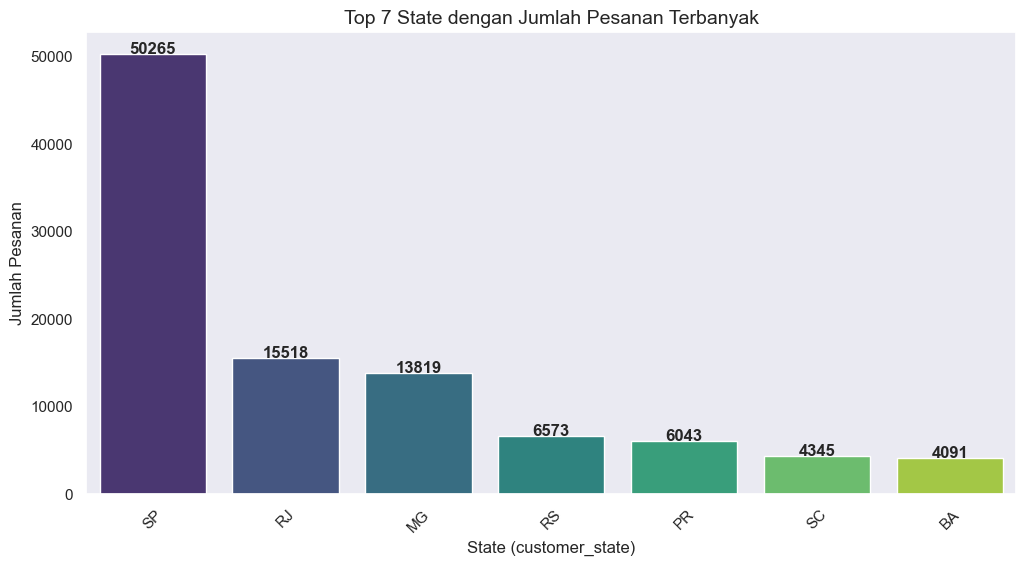

In [119]:
# Menghitung jumlah pesanan per state dan mengambil top 7 state dengan pesanan terbanyak
top_7_states = final_orders_df['customer_state'].value_counts().nlargest(7)

plt.figure(figsize=(12, 6))
ax = sns.barplot(x=top_7_states.index, y=top_7_states.values, palette="viridis")

# Menambahkan angka di atas setiap bar
for i, value in enumerate(top_7_states.values):
    plt.text(i, value + 50, str(value), ha="center", fontsize=12, fontweight="bold")

plt.title("Top 7 State dengan Jumlah Pesanan Terbanyak", fontsize=14)
plt.xlabel("State (customer_state)", fontsize=12)
plt.ylabel("Jumlah Pesanan", fontsize=12)
plt.xticks(rotation=45)  # Memiringkan label agar lebih mudah dibaca

plt.show()


### Pertanyaan 2: Berapa total revenue yang dihasilkan serta persentase biaya pengiriman?

In [120]:
# Filter hanya untuk pesanan dengan status 'delivered'
delivered_orders = final_orders_df[final_orders_df['order_status'] == 'delivered']

# Menghitung total revenue (price + freight_value)
total_revenue = delivered_orders['price'].sum() + delivered_orders['freight_value'].sum()

# Menghitung net profit (asumsinya sama dengan total revenue)
net_profit = total_revenue

print("Total Revenue from Delivered Orders: ", total_revenue)
print("Net Profit from Delivered Orders: ", net_profit)


Total Revenue from Delivered Orders:  16188779.230000002
Net Profit from Delivered Orders:  16188779.230000002


**Insight:**
- sao paulo merupakan state yang memiliki jumlah pesanan terbanyak sehingga saran yang bisa saya berikan kepada perusahaan adalah menambah titik lokasi jasa kirim agar proses pengiriman bisa maksimal.

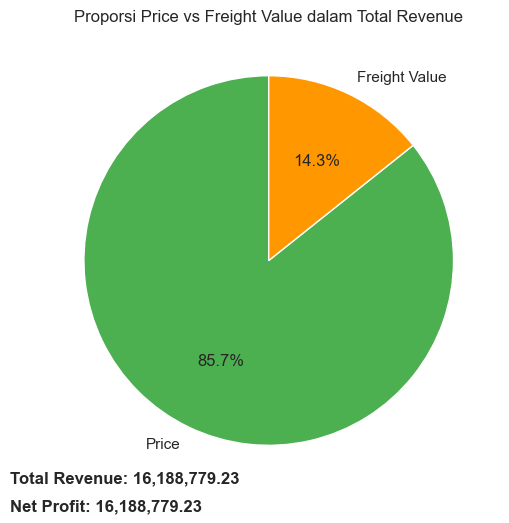

In [121]:
# Filter hanya untuk pesanan dengan status 'delivered'
delivered_orders = final_orders_df[final_orders_df['order_status'] == 'delivered']

# Menghitung total revenue
total_revenue = delivered_orders['price'].sum() + delivered_orders['freight_value'].sum()

# Menghitung net profit anggap sama dengan total revenue
net_profit = total_revenue

# Data untuk pie chart
labels = ["Price", "Freight Value"]
values = [delivered_orders["price"].sum(), delivered_orders["freight_value"].sum()]
colors = ["#4CAF50", "#FF9800"]

fig, ax = plt.subplots(figsize=(10, 6))

# Membuat pie chart
ax.pie(values, labels=labels, autopct='%1.1f%%', colors=colors, startangle=90, wedgeprops={"edgecolor": "white"})

# Menambahkan teks total revenue dan net profit di bawah pie chart
plt.text(-1.4, -1.2, f"Total Revenue: {total_revenue:,.2f}", fontsize=12, fontweight="bold")
plt.text(-1.4, -1.35, f"Net Profit: {net_profit:,.2f}", fontsize=12, fontweight="bold")

plt.title("Proporsi Price vs Freight Value dalam Total Revenue")

plt.show()

**Insight:**
- total revenue yang dihasilkan adlah 16188779.230000002 hal ini cukup baik perusahaan dapat mempertahankan atau mungkin meningkatkan dengan menerapkan saran yang diberikan pada conclusion dan persentasi biaya pengeriman sebesar 14.03% masih mendapat respon yang positif berdasarkan conclusion pertanyaan 4.

### Pertanyaan 3: Bagaimana performa pendapatan total revenue yang dihasilkan setiap bulannya?

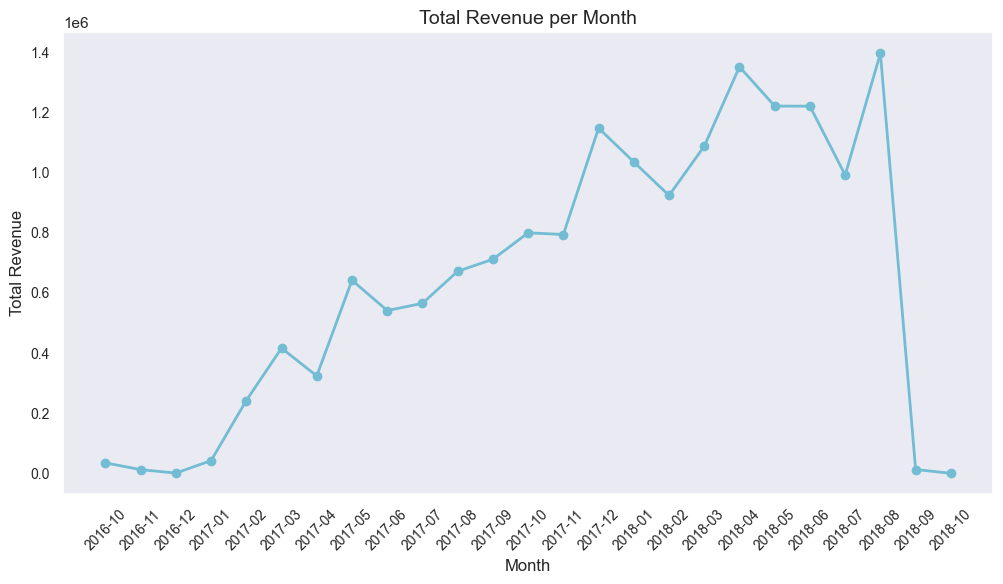

In [122]:
# Filter hanya pesanan dengan status 'delivered'
delivered_orders = final_orders_df[final_orders_df["order_status"] == "delivered"]

# Mengelompokkan data berdasarkan bulan & menghitung total revenue
monthly_revenue = (
    delivered_orders
    .groupby(delivered_orders["order_delivered_customer_date"].dt.to_period("M"))
    .agg(total_revenue=("price", "sum"), total_freight=("freight_value", "sum"))
)

# Mendapatkan total revenue
monthly_revenue["total_revenue"] += monthly_revenue["total_freight"]

# Reset index agar bisa digunakan untuk plotting
monthly_revenue = monthly_revenue.reset_index()

# Konversi kembali ke string agar mudah dibaca di plot
monthly_revenue["order_delivered_customer_date"] = monthly_revenue["order_delivered_customer_date"].astype(str)

# Visualisasi total revenue per bulan
plt.figure(figsize=(12, 6))
plt.plot(
    monthly_revenue["order_delivered_customer_date"],
    monthly_revenue["total_revenue"],
    marker="o",
    linewidth=2,
    color="#72BCD4"
)

plt.title("Total Revenue per Month", fontsize=14)
plt.xlabel("Month", fontsize=12)
plt.ylabel("Total Revenue", fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)

plt.show()

**Insight:**
- Hasil dari line chart diatas menunjukan performa e-commerce cukup baik karena selalu meningkat
- Hal yang menarik adalah pada bulan 9 dan 10 tahun 2018 revenue menurun drastis sehingga ini bisa menjadi evaluasi apa yang menyebabkan customer membeli lebih sedikit dibandingkan bulan sebelumnya

### Pertanyaan 4: Bagaimana tingkat kepuasan custumer berdasarkan hasil review?

C:\Users\Rizqi Maulidi\AppData\Local\Temp\ipykernel_10184\2539079128.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=review_counts.index, y=review_counts.values, palette="viridis")


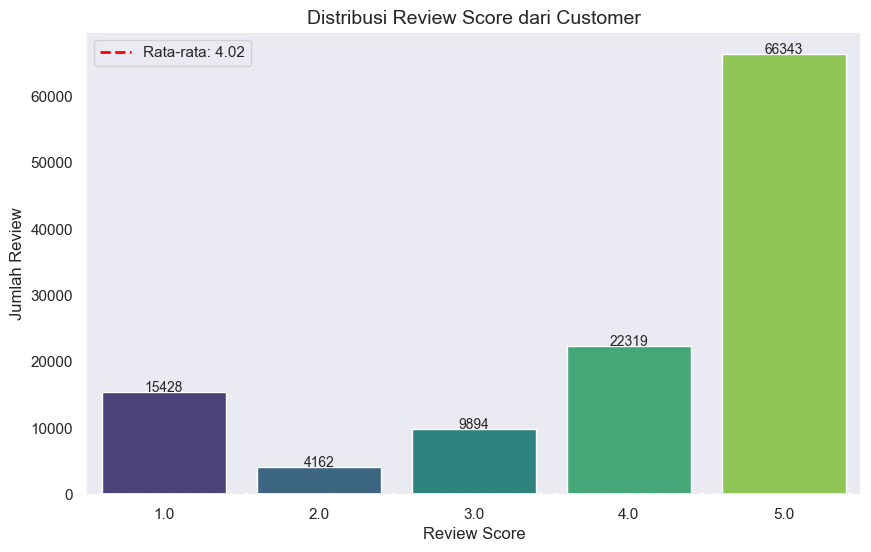

In [123]:
# Mengabaikan nilai kosong pada review_score
valid_reviews = final_orders_df.dropna(subset=["review_score"])

# Menghitung jumlah masing-masing review score
review_counts = valid_reviews["review_score"].value_counts().sort_index()

# Menghitung rata-rata review score
avg_review_score = valid_reviews["review_score"].mean()

# Membuat bar chart
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=review_counts.index, y=review_counts.values, palette="viridis")

# Menambahkan judul dan label
plt.title("Distribusi Review Score dari Customer", fontsize=14)
plt.xlabel("Review Score", fontsize=12)
plt.ylabel("Jumlah Review", fontsize=12)

# Menampilkan jumlah di atas setiap bar
for i, v in enumerate(review_counts.values):
    plt.text(i, v + 5, str(v), ha='center', fontsize=10)

# Menambahkan garis horizontal rata-rata review score
plt.axhline(y=avg_review_score, color='red', linestyle='dashed', linewidth=2, label=f'Rata-rata: {avg_review_score:.2f}')

plt.legend()

plt.show()

**Insight:**
- Hasil dari bar chart diatas menunjukan performa e-commerce cukup baik karena mayoritas memberikan review 5 atau sempurna.
- Selain itu rata-rata dari hasil review juga 4.02 yang cukup tinggi.

## Analisis Lanjutan (Opsional)

In [124]:
# kelompokan data data berdasarkan customer_id dan menghitung nilai RFM
rfm_df = final_orders_df.groupby(by="customer_id", as_index=False).agg({
    "order_delivered_customer_date": "max",  # Mengambil tanggal order terakhir
    "order_id": "nunique",  # Menghitung jumlah order (Frequency)
    "price": "sum",  # Total harga produk
    "freight_value": "sum"  # Total biaya pengiriman
})

# Menghitung total revenue sebagai Monetary
rfm_df["monetary"] = rfm_df["price"] + rfm_df["freight_value"]

# Mengubah nama kolom
rfm_df.rename(columns={"order_delivered_customer_date": "max_order_timestamp", "order_id": "frequency"}, inplace=True)

# cari tanggal terbaru dalam dataset
recent_date = final_orders_df["order_delivered_customer_date"].max().date()

# Mengonversi max_order_timestamp ke format date
rfm_df["max_order_timestamp"] = rfm_df["max_order_timestamp"].dt.date

# Menghitung nilai Recency (selisih hari sejak transaksi terakhir)
rfm_df["recency"] = rfm_df["max_order_timestamp"].apply(lambda x: (recent_date - x).days)

# Menghapus kolom yang tidak diperlukan
rfm_df.drop(["max_order_timestamp", "price", "freight_value"], axis=1, inplace=True)

# Menampilkan hasil
rfm_df.head()


,customer_id,frequency,monetary,recency
0,00012a2ce6f8dcda20d059ce98491703,1,114.74,349
1,000161a058600d5901f007fab4c27140,1,67.41,475
2,0001fd6190edaaf884bcaf3d49edf079,1,195.42,616
3,0002414f95344307404f0ace7a26f1d5,1,179.35,425
4,000379cdec625522490c315e70c7a9fb,1,107.01,213


C:\Users\Rizqi Maulidi\AppData\Local\Temp\ipykernel_10184\3742498312.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="recency", y="customer_id",
C:\Users\Rizqi Maulidi\AppData\Local\Temp\ipykernel_10184\3742498312.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="frequency", y="customer_id",
C:\Users\Rizqi Maulidi\AppData\Local\Temp\ipykernel_10184\3742498312.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="monetary", y="customer_id",


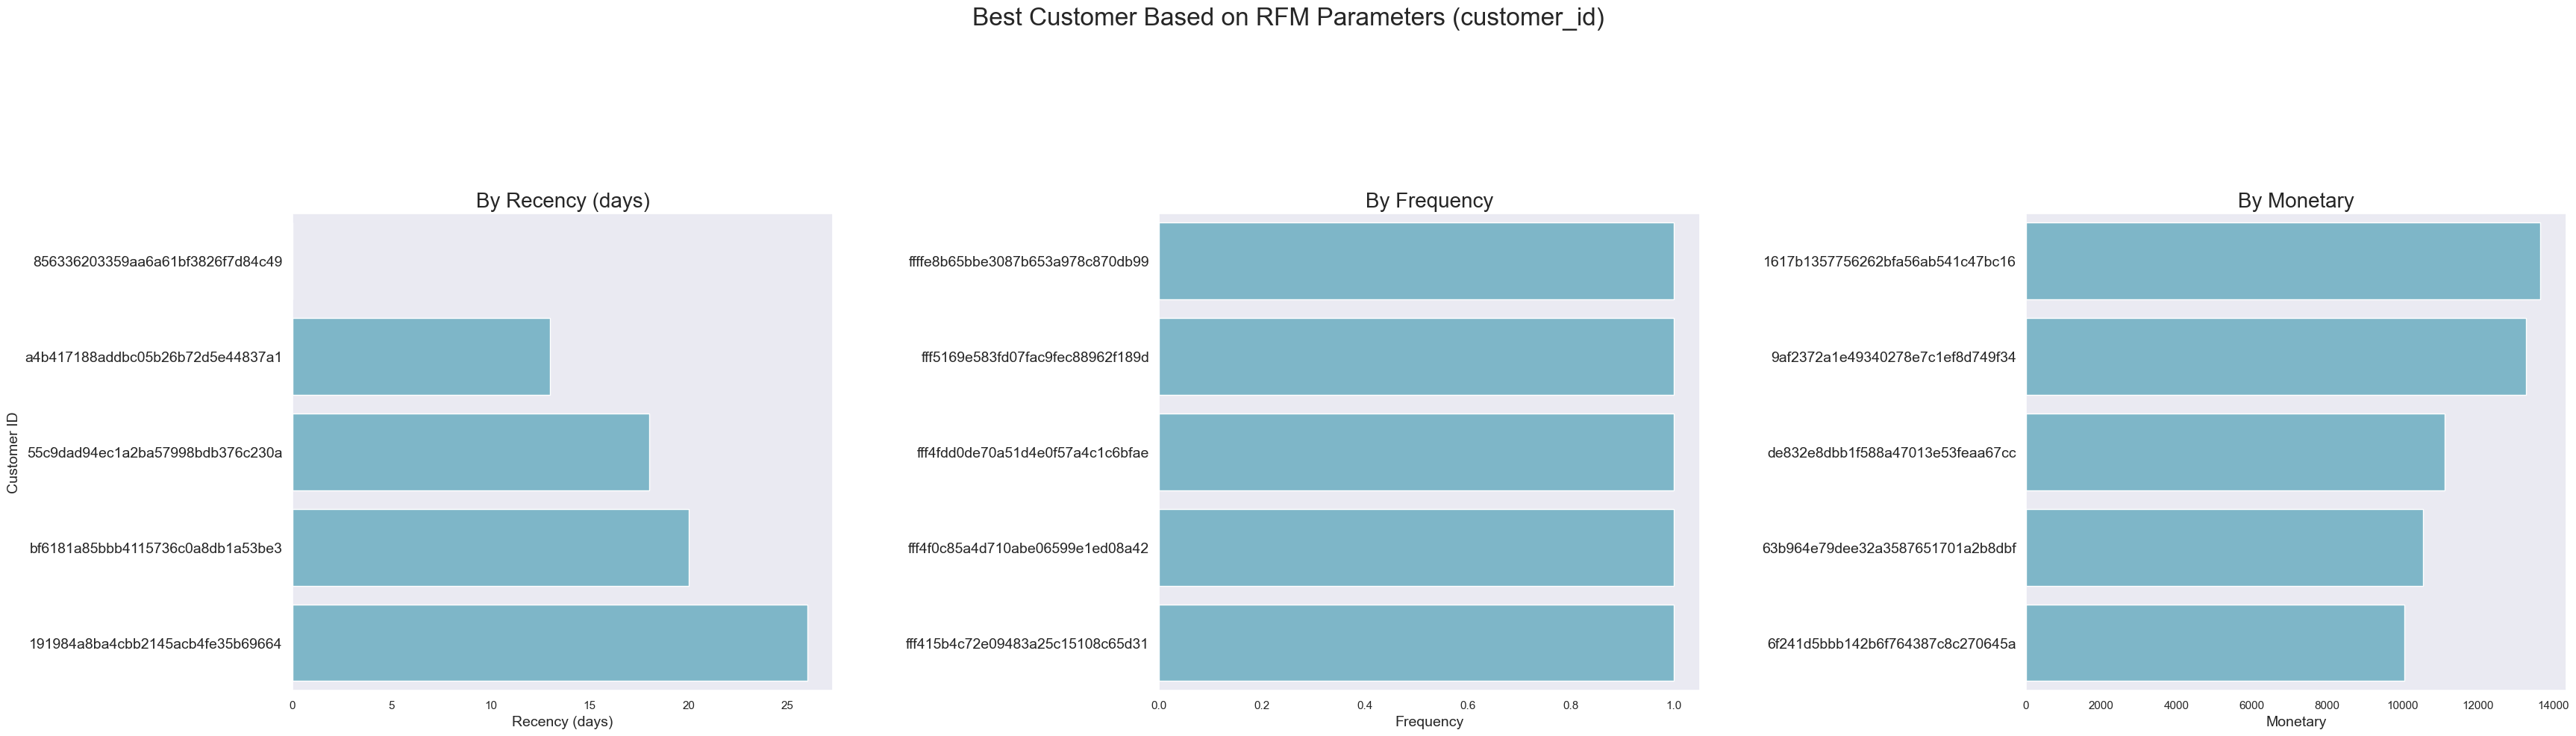

In [128]:
# Membuat subplot dengan 3 grafik
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(36, 10))  # Lebar lebih besar untuk memberi ruang

# Menambah jarak antar grafik agar text tidak dempet
plt.subplots_adjust(wspace=0.5)  # Meningkatkan jarak antar subplot

colors = ["#72BCD4"] * 5

# Visualisasi Recency (Pelanggan dengan transaksi terbaru)
sns.barplot(x="recency", y="customer_id",
            data=rfm_df.sort_values(by="recency", ascending=True).head(5),
            palette=colors, ax=ax[0])
ax[0].set_ylabel("Customer ID", fontsize=14)
ax[0].set_xlabel("Recency (days)", fontsize=14)
ax[0].set_title("By Recency (days)", loc="center", fontsize=20)
ax[0].tick_params(axis='y', labelsize=14)

# Visualisasi Frequency (Pelanggan dengan jumlah transaksi terbanyak)
sns.barplot(x="frequency", y="customer_id",
            data=rfm_df.sort_values(by="frequency", ascending=False).head(5),
            palette=colors, ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel("Frequency", fontsize=14)
ax[1].set_title("By Frequency", loc="center", fontsize=20)
ax[1].tick_params(axis='y', labelsize=14)

# Visualisasi Monetary (Pelanggan dengan total belanja terbesar)
sns.barplot(x="monetary", y="customer_id",
            data=rfm_df.sort_values(by="monetary", ascending=False).head(5),
            palette=colors, ax=ax[2])
ax[2].set_ylabel(None)
ax[2].set_xlabel("Monetary", fontsize=14)
ax[2].set_title("By Monetary", loc="center", fontsize=20)
ax[2].tick_params(axis='y', labelsize=14)

plt.suptitle("Best Customer Based on RFM Parameters (customer_id)", fontsize=24, y=1.05)

plt.tight_layout(pad=5)  # Padding antar elemen agar lebih renggang
plt.show()


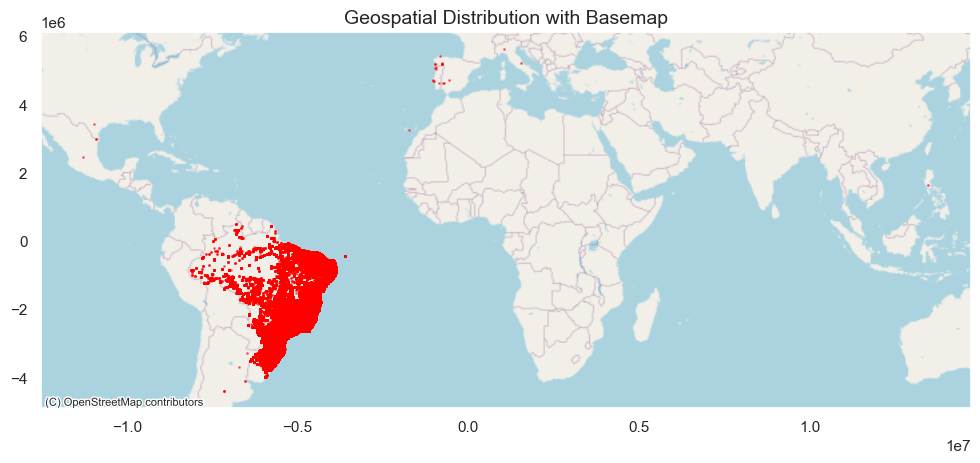

In [129]:
# Membuat GeoDataFrame
gdf = gpd.GeoDataFrame(geolocation_dataset_df,
                       geometry=gpd.points_from_xy(geolocation_dataset_df["geolocation_lng"],
                                                   geolocation_dataset_df["geolocation_lat"]),
                       crs="EPSG:4326")  # Tambahkan CRS awal (WGS 84)

# Konversi ke sistem koordinat Web Mercator
gdf = gdf.to_crs(epsg=3857)

# Plot dengan basemap
fig, ax = plt.subplots(figsize=(12, 12))
gdf.plot(ax=ax, markersize=1, alpha=0.5, color="red")  # Titik lokasi
ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik)  # Menambahkan peta background

# Menampilkan plot
plt.title("Geospatial Distribution with Basemap", fontsize=14)
plt.show()


C:\Users\Rizqi Maulidi\AppData\Local\Temp\ipykernel_10184\3571785487.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=category_counts.index, y=category_counts.values, palette=["blue", "orange", "red"])


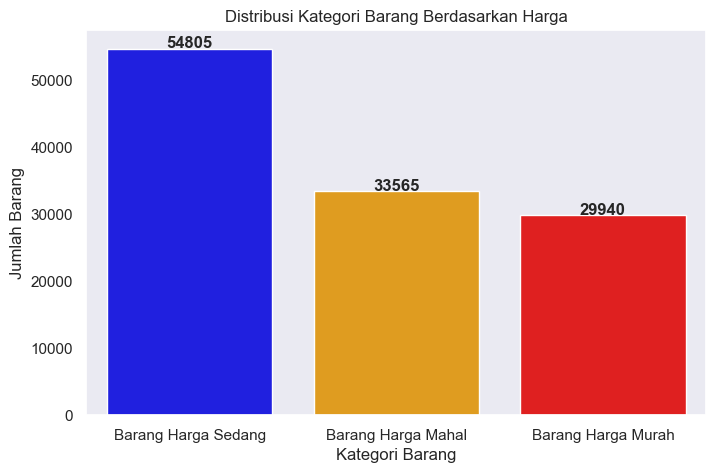

In [130]:
#Clustering
#Abaikan nilai kosong
final_orders_df = final_orders_df.dropna(subset=["price"])

#Tentukan threshold kategori harga
q1 = final_orders_df["price"].quantile(0.25)  # Persentil 25% (harga murah)
q3 = final_orders_df["price"].quantile(0.75)  # Persentil 75% (harga mahal)
mean_price = final_orders_df["price"].mean()  # Harga rata-rata

#Buat kelad secara manual
def categorize_price(price):
    if price <= q1:
        return "Barang Harga Murah"
    elif price <= mean_price:
        return "Barang Harga Sedang"
    else:
        return "Barang Harga Mahal"

final_orders_df["price_category"] = final_orders_df["price"].apply(categorize_price)

#Hitung jumlah barang di setiap kelas
category_counts = final_orders_df["price_category"].value_counts()

#Visualisasi dengan bar chart
plt.figure(figsize=(8, 5))
ax = sns.barplot(x=category_counts.index, y=category_counts.values, palette=["blue", "orange", "red"])

#Tambahkan angka di atas setiap bar
for i, count in enumerate(category_counts.values):
    ax.text(i, count + 50, str(count), ha='center', fontsize=12, fontweight='bold')

plt.xlabel("Kategori Barang")
plt.ylabel("Jumlah Barang")
plt.title("Distribusi Kategori Barang Berdasarkan Harga")
plt.show()


## Conclusion

- Conclution pertanyaan 1 : sao paulo merupakan state yang memiliki jumlah pesanan terbanyak sehingga saran yang bisa saya berikan kepada perusahaan adalah menambah titik lokasi jasa kirim agar proses pengiriman bisa maksimal.
- Conclution pertanyaan 2 : total revenue yang dihasilkan adlah 16188779.230000002 hal ini cukup baik perusahaan dapat mempertahankan atau mungkin meningkatkan dengan menerapkan saran yang diberikan pada conclusion dan persentasi biaya pengeriman sebesar 14.03% masih mendapat respon yang positif berdasarkan conclusion pertanyaan 4.
- Conclution pertanyaan 3 : performa pendapatan total Berapa total revenue yang dihasilkan setiap bulannya cukup baik hal ini dapat dilihat dari grafik line chart yang konsisten namun ada hal yang menarik adalah pada bulan 9 dan 10 tahun 2018 revenue menurun drastis sehingga ini bisa menjadi evaluasi lebih lanjut apa yang menyebabkan customer membeli lebih sedikit dibandingkan bulan sebelumnya
- Conclution pertanyaan 4 : Hasil dari bar chart diatas menunjukan performa e-commerce cukup baik karena mayoritas memberikan review 5 atau sempurna, selain itu rata-rata dari hasil review juga 4.02 yang cukup tinggi. Perusahaan dapat terus mempertahankan strategi penjualan yang dilakukan karena sudah berjalan dengan baik.